In [11]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import norm
import os
import config as cfg

sys.path.append(r"/home/sehlalou/repo/thesis/iridia_af")

import hyperparameters as hp
from record import Record

In [15]:
dataset_path = Path(hp.DATASET_PATH, f"dataset_hrv_{cfg.WINDOW_SIZE}_{cfg.TRAINING_STEP}.csv")
df = pd.read_csv(dataset_path)
df.drop(columns=["label", "patient", "record"], inplace=True)

/tmp/ipykernel_26056/3348406477.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


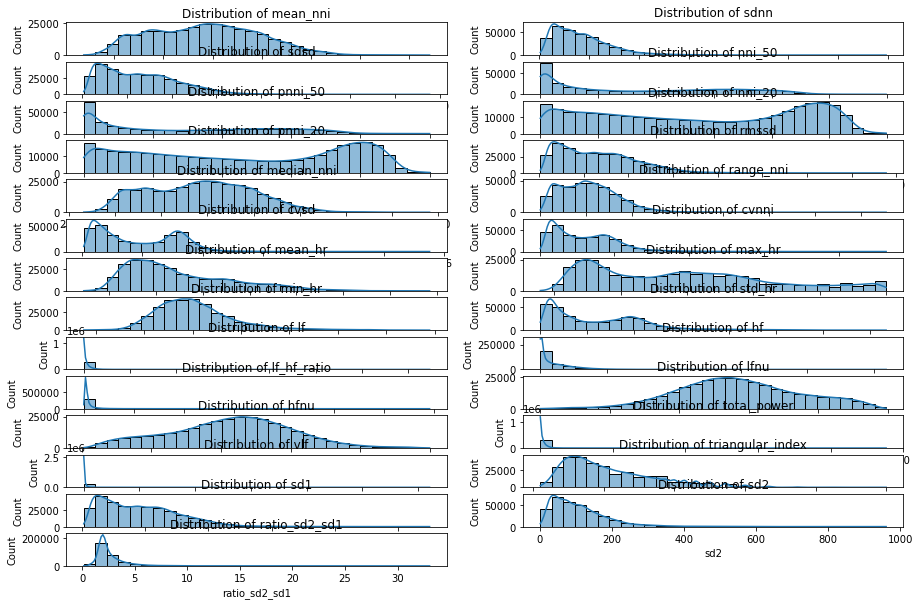

/tmp/ipykernel_26056/3348406477.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


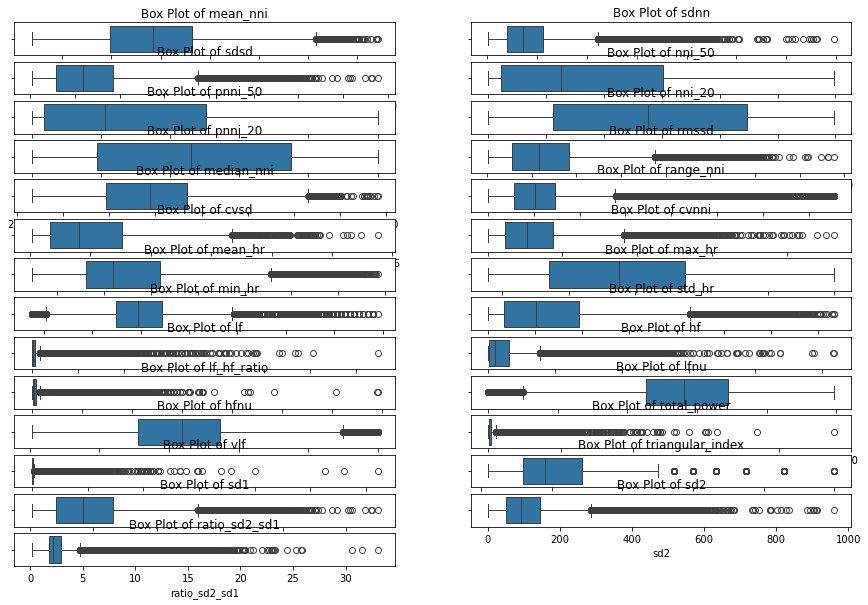

In [22]:
import math

features_to_scale = df.columns.tolist()

# Histograms
plt.figure(figsize=(15, 10))
num_features = len(features_to_scale)
num_rows = math.ceil(num_features / 2)  # Automatically calculate rows based on number of features
for i, feature in enumerate(features_to_scale, 1):
    plt.subplot(num_rows, 2, i)  # 2 columns, dynamically calculated rows
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_scale, 1):
    plt.subplot(num_rows, 2, i)  # 2 columns, dynamically calculated rows
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


27


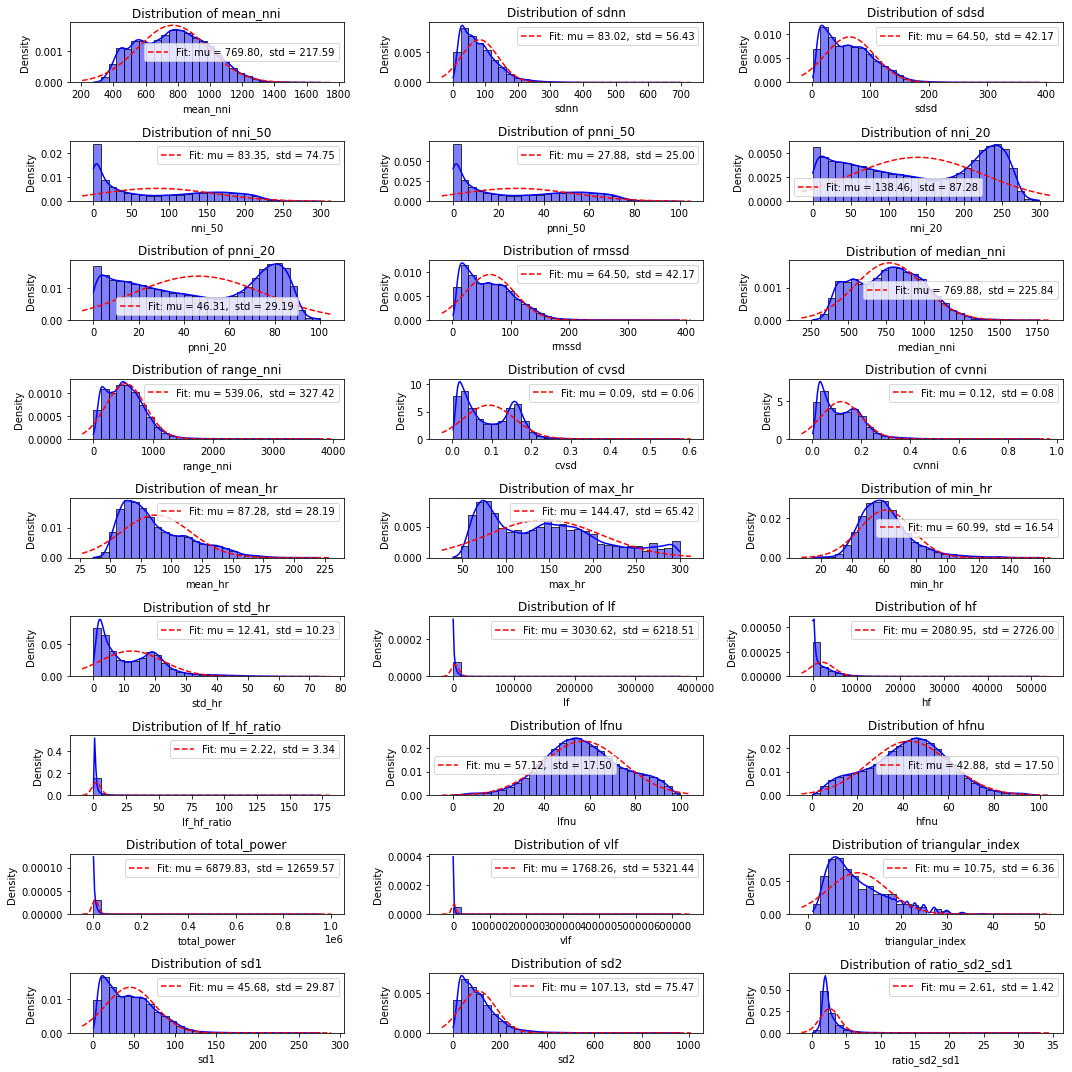

In [20]:


# Set up the matplotlib figure
num_features = df.shape[1]  # Number of features (columns) in the dataframe
print(num_features)

plt.figure(figsize=(15, 15))

for i, feature in enumerate(df.columns):
    # Ensure the number of rows is an integer
    num_rows = int(np.ceil(num_features / 3))  # Round up and cast to int
    plt.subplot(num_rows, 3, i + 1)
    
    sns.histplot(df[feature], kde=True, stat='density', bins=30, color='blue', edgecolor='black')
    
    # Fit a normal distribution and plot it
    mu, std = norm.fit(df[feature])  # Fit a normal distribution (mean and standard deviation)
    xmin, xmax = plt.xlim()  # Get the current x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Calculate the PDF of the normal distribution
    plt.plot(x, p, 'r', linestyle='--', label='Fit: mu = %.2f,  std = %.2f' % (mu, std))
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
